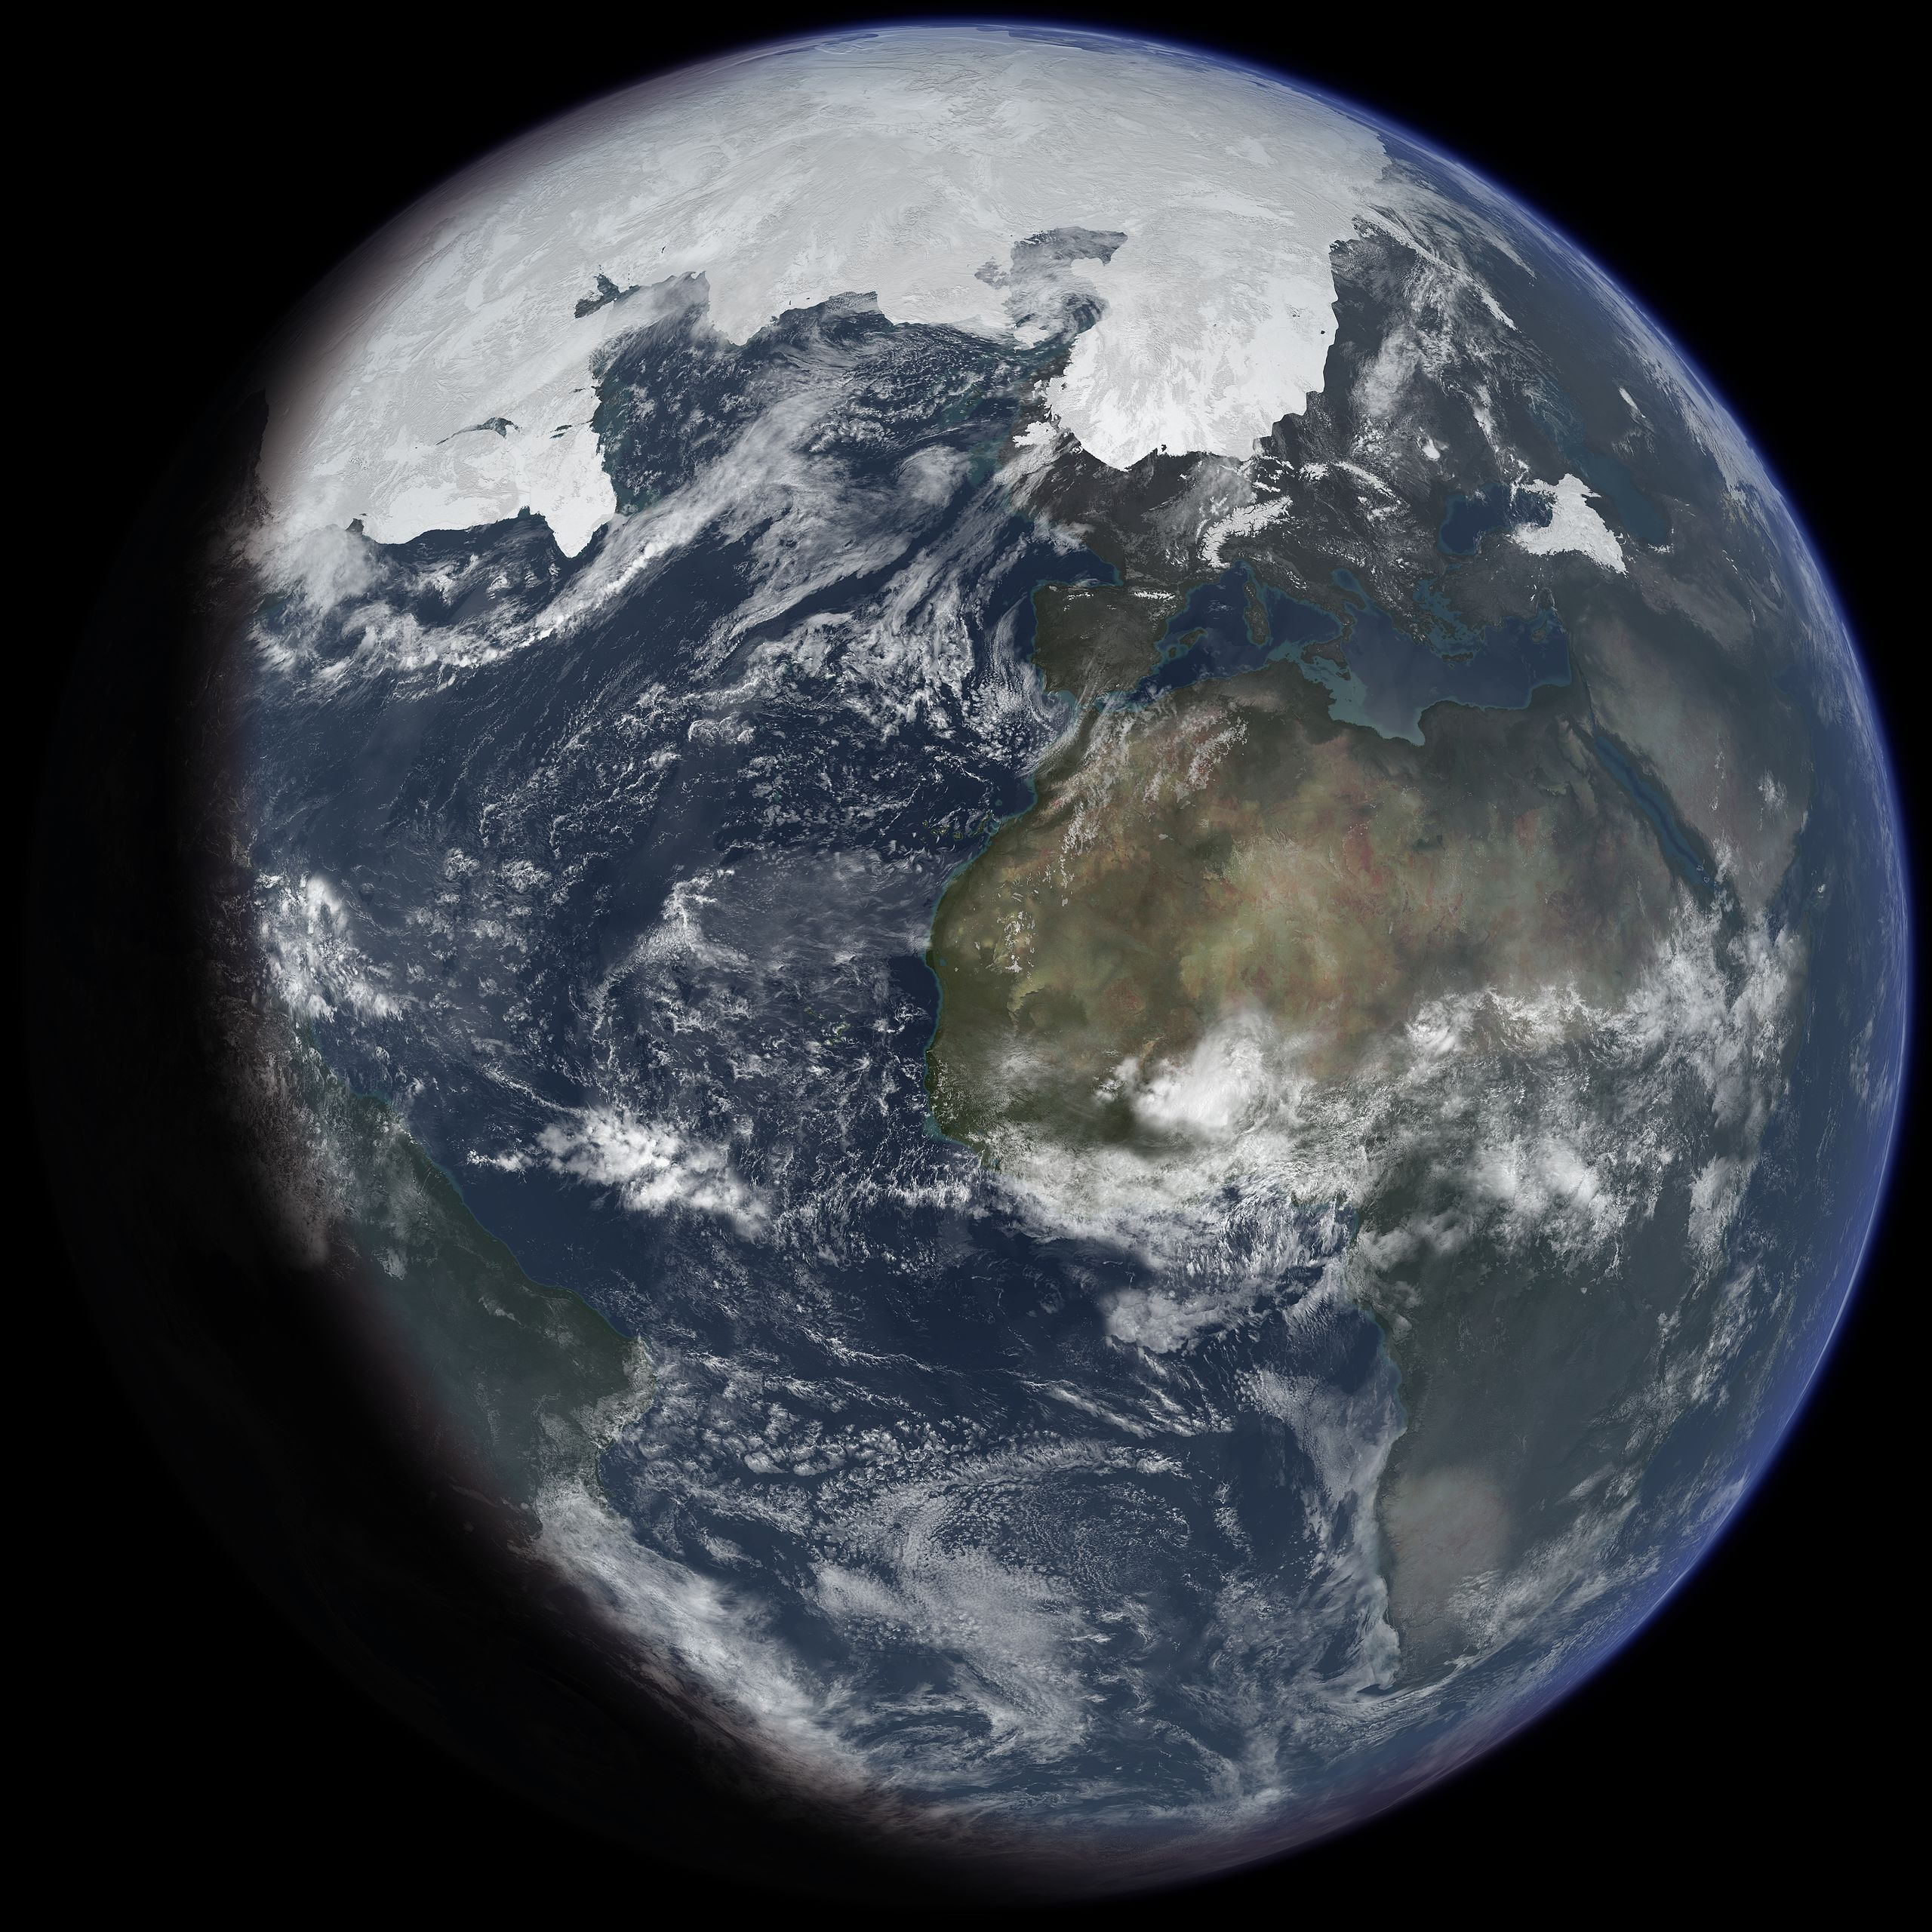
Earth at the last glacial maximum of the current ice age. Based on: "Ice age terrestrial carbon changes revisited" by Thomas J. Crowley (Global Biogeochemical Cycles, Vol. 9, 1995, pp. 377-389

In [ ]:
from modqa4 import global_temperature_model, easy_fft
from matplotlib.pyplot import plot, xlabel, ylabel, show, subplots, grid,twinx,xscale,yscale
from numpy import linspace, pi, sin, max
import pandas as pd

# Activity 1: Celestial forcing of the Pleistocene Ice Ages

In this first activity, you will examine the relationship between celestial forcing and the Pleistocene ice ages.  Our main question for this activity is: **what is the dominant control on the ice age cycles?**

First, we'll load datasets that contain orbital parameters and oxygen isotope data:

In [ ]:
orbital_history = pd.read_fwf('orbit91',)
oxygen_isotopes = pd.read_csv('LR04_constsed_Lisiecki2010.txt',delimiter='\t',comment='%',header=0)

Let's have a look at those datasets:

In [ ]:
orbital_history

In [ ]:
oxygen_isotopes

In [ ]:
fig,ax = subplots(figsize=(10,5))
plot(orbital_history.AGE,orbital_history.ECC,'-b')
ylabel('Orbital Eccentricity',c='b')

ax2=twinx()
ax2.plot(-oxygen_isotopes.age,oxygen_isotopes.d18O,'-k')
xlabel('Age (Thousands of years)')
ylabel('"Glaciation Index"\n(bigger values -> warmer temperature, less ice)')
ax.set_xlim([-1000,0])
grid()
show()

**Part 1.** Please plot obliquity, precession, the net insolation at 65N in July and February, and the oxygen isotope record over the last 1 Ma.  You have free choice over how to organize these plots, but they should be made in a way that can help answer our question for this activity.

**Part 2.** What are the timescales of these different orbital forcings?

Let's start this part by considering a very simple model of a a sine wave that has a period of 1000 years:

In [ ]:
t = linspace(0,10000,10000)
y = sin(2*pi*t/1000)


subplots()
plot(t,y)
xlabel('Years')
ylabel('Amplitude')
show()

This plot show the amplitude of a sine wave as a function of time. This type of plot could be called time-domain analysis: it looks at how some quantity varies as a function of *time*.

We can use a tool called a four transform (through the function ```easy_fft```) to examine how the same signal varies as a function of *frequency*.

In [ ]:
ft,period = easy_fft(y)

When we plot the result, we see that the frequency representation of this signal contains only a single spike of enevery at exactly 1000 year period.

In [ ]:
subplots()
plot(period,ft)
xscale('log')
xlabel('Period (years)')
show()

**Part 2.** Repeat this frequency analysis for the oxygen-isotop, eccentricity, precesion, and obliquity data.  Which orbital parameter provides the closest fit to the oxygen-isotope record of ice mass?  Is there an exact fit? Hint: check the lecture slides.

# Activity 2: Climate Model of Snowball Earth
Climate models, also known as general circulation models or GCMs, use mathematical equations to characterize how energy and matter interact in different parts of the ocean, atmosphere, land ([more info](https://www.climate.gov/maps-data/climate-data-primer/predicting-climate/climate-models#:~:text=Climate%20models%2C%20also%20known%20as,the%20ocean%2C%20atmosphere%2C%20land.)). 

In this part of the QA we're going to run an extremely simple climate model called `global_temperature_model`. The function `global_temperature_model` takes a single input argument: the incomming solar radiation (units W/m$^2$) and returns the global equilibrium temperature.

First, create an array of solar radiation values from 0 to 2000 W/m**2.

In [ ]:
solar_radiation = linspace(0,2000,100)

Calculate equilibrium temperatures:

In [ ]:
equilibrium_temperatures = global_temperature_model( solar_radiation )

Finally, plot the results:

In [ ]:
subplots()
plot(solar_radiation, equilibrium_temperatures - 273.15)
xlabel('Incomming solar radiation (W/m**2)')
ylabel('Temperature (deg C)')
show()

**Part 1.** In the following markdown cell, explain the climate transition that occurs in our simple climate model. What events in Earth history could this behavior explain?

**Part 2.**  What happens if the Earth has different albedos?  Use the following syntax to explore different values of the icy and non-icy planetary albedo,

```global_temperature_model(S,albedo_ice=0.9,albedo_noice=0.1)```

Then, write a brief description of what you learned.